In [1]:
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt
from timeit import default_timer as timer
%matplotlib inline

In [2]:
N = 1536 , 1024
data = np.empty(N, np.uint8)

In [3]:
dev_data = cuda.to_device(data)

In [4]:
@cuda.jit
def cu_make_fractal(xmin, xmax, ymin, ymax, data, max_iters):
    width, height = data.shape
    dx = (xmax - xmin) / width
    dy = (ymax - ymin) / height
    i, j = cuda.grid(2)
    x = xmin + dx * (i + 0.5)   
    y = ymin + dy * (j + 0.5)
    #c = complex(x, y)
    #z = 0j
    zr, zi = 0, 0
    for iters in range(max_iters):
        #z = z**2 + c
        zr, zi = zr * zr - zi * zi + x, 2 * zr * zi + y 
        if (zr * zr + zi * zi > 4.0):
            break
    data[i,j] = iters
    

In [5]:
threads = 8, 8
blocks = N[0]//threads[0], N[1]//threads[1]

In [6]:
start = timer()
cu_make_fractal[blocks, threads](-2.0, 1.0, -1.0, 1.0, dev_data, 255)
end = timer()
print("Generated fractal image in {time:.3f} ms".format(time = 1000 * (end - start)))

Generated fractal image in 328.727 ms


In [7]:
dev_data.to_host()

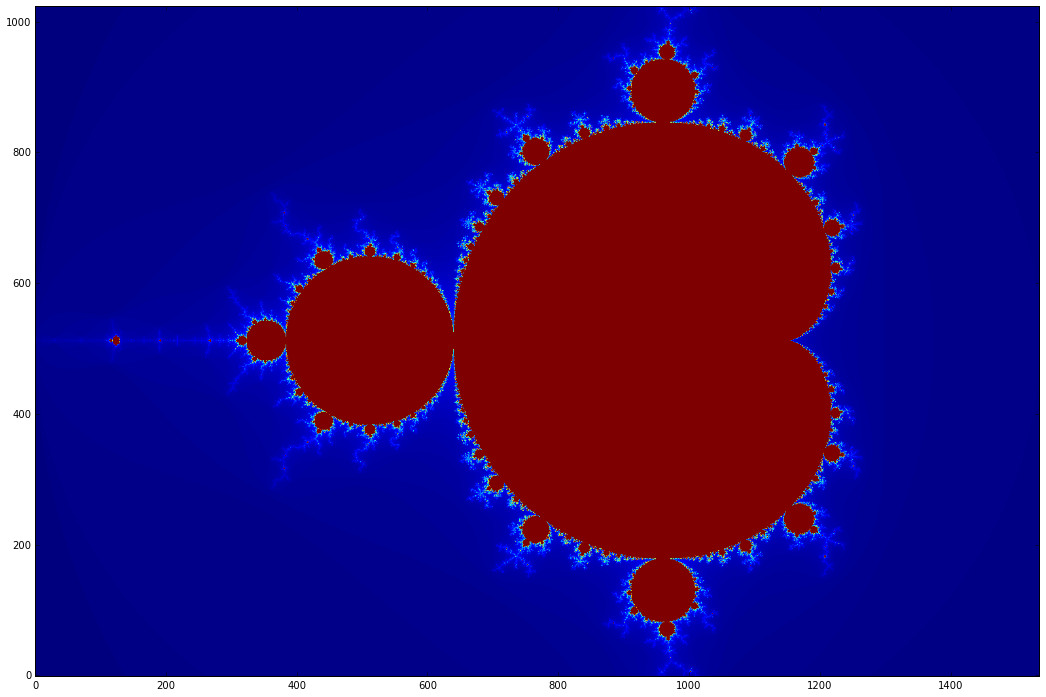

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 12.0)
plt.imshow(data.transpose(), origin='top')